# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10_Myt.csv")
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type
0,penthouse,turnhout,2300,10666429,€,Grote Markt 22,4,C,218,No,...,4,1997,As new,0,1,0,0,2,0,Gas
1,house,essen,2910,10666428,€469000,Heidestatiestraat 26,3,D,390,No,...,4,0,0,0,1,0,0,2,Installed,0
2,house,bierges,1301,10666426,€1395000,"Rue de Wavre, 27",5,C,178,0,...,4,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil
3,apartment,arlon,6700,10666424,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
4,house,arlon,6700,10666423,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,€1199000,Donksesteenweg 212,6,B,199,No,...,0,0,As new,0,2,0,No,3,Installed,Gas
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,€450000,Herbert Hooverplein 14,3,B,120,No,...,2,2007,Good,0,2,0,0,0,Hyper equipped,Gas
10136,penthouse,braine-l%27alleud,1420,10642943,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,3,2021,0,0,2,0,0,0,0,0
10137,house,wevelgem,8560,10642937,€340000,Markeplaats 9,4,B,161,0,...,0,1967,0,0,0,0,No,0,0,0


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE in the same folder as this notebook"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [ ]:
### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data_myt.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_myt_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.loc[:, "Address"].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price"].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10139
9446
8977


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price

properties_raw["Price2"] = properties_raw.loc[:, "Price"].str.replace("\D", "", regex = True)


In [5]:
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
print(properties_raw.shape[0])

8977
8833


In [6]:
print("raw: ",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
print("limited to 3M:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 9999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("new limited 10K-3M:",properties_raw.shape[0])

raw:  8833
limited to 3M: 8828
new limited 10K-3M: 8700


In [7]:
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw.drop(["Price2"], axis=1)
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,No,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,No,...,As new,0,2,0,No,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,No,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,No,0,0,0,340000,€340000


### Turns Furnished, Terrace & Office Binary

In [8]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4441
No           4013
Yes           246
Name: count, dtype: int64
Furnished
0            8454
1             246
Name: count, dtype: int64
Terrace
0          6425
Yes        2275
Name: count, dtype: int64
Terrace
0          6425
1          2275
Name: count, dtype: int64
Office
0         5462
No        2016
Yes       1222
Name: count, dtype: int64
Office
0         7478
1         1222
Name: count, dtype: int64


In [9]:
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,0,...,As new,0,2,0,0,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,0,0,0,0,340000,€340000


In [10]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])

In [11]:
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6425
1    2275
Name: count, dtype: int64
Terrace2
1    5219
0    3481
Name: count, dtype: int64


In [12]:
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw.drop(["Terrace2"], axis=1)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,0,...,As new,0,2,0,0,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,0,0,0,0,340000,€340000


### Property Type & subtype

In [13]:
properties_raw.rename(columns = {'Type of property':'property_subtype'}, inplace = True)
print(properties_raw[["property_subtype"]].value_counts())

property_subtype                  
house                                 4016
apartment                             2392
villa                                  575
apartment-block                        238
duplex                                 204
mixed-use-building                     167
ground-floor                           161
new-real-estate-project-apartments     139
penthouse                              138
flat-studio                            109
exceptional-property                    96
new-real-estate-project-houses          90
mansion                                 68
town-house                              55
country-cottage                         48
bungalow                                44
loft                                    28
farmhouse                               27
chalet                                  22
service-flat                            18
manor-house                             17
triplex                                 15
other-property     

In [14]:
df_proptype = pd.read_csv("../data/propertytype.csv", encoding="latin-1")
properties_raw = properties_raw.merge(df_proptype, on=['property_subtype'], how='left')
properties_raw.sample(10)

,property_subtype,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,property_type
662,villa,hamme,1785,10666008,895000,De Limburgstirumlaan 21,4,C,205,0,...,2,0,1,0,Hyper equipped,Gas,895000,€895000,1,house
6699,villa,balsicas,30591,10324165,250000,Rue des Raines 1,3,Not specified,Not specified,0,...,2,0,0,2,Hyper equipped,0,250000,€250000,1,house
8394,house,gr%C3%82ce-hollogne,4460,10643851,169500,Rue Charles Magnette 24/40,2,F,497,0,...,2,0,1,2,Not installed,0,169500,€169500,1,house
1671,house,diksmuide,8600,10663254,175000,Houtmarkt 9,2,F,948,0,...,1,0,0,0,0,Fuel oil,175000,€175000,0,house
2945,farmhouse,bavikhove,8531,10659130,625000,Vierkeerstraat 2 bus 2,4,F,813,0,...,1,0,0,1,0,0,625000,€625000,0,house
654,apartment,pilar%20de%20la%20horadada,03190,10666023,295000,Elisabethlaan 336,3,Not specified,Not specified,0,...,2,0,0,0,0,0,295000,€295000,1,apartment
6309,house,wiheries,7370,10650069,180000,101 rue de Valenciennes,2,G,542,0,...,1,1,1,1,Installed,Fuel oil,180000,€180000,1,house
1446,apartment,evere,1140,10663788,250000,"Avenue des Cerisiers, 212",2,E,217,0,...,1,0,0,1,Semi equipped,Fuel oil,250000,€250000,1,apartment
2462,new-real-estate-project-apartments,destelbergen,9070,10660243,451250,Sint-Denijslaan 1,0,Not specified,Not specified,0,...,0,0,0,0,0,0,451250,€451250,0,apartment
6554,apartment,buizingen,1501,10649232,235000,Winderickxplein 9,2,C,235,0,...,1,0,0,1,Installed,Gas,235000,€235000,1,apartment


In [15]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [16]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1954
B                1386
C                1299
D                1100
F                1083
E                 793
A                 560
G                 471
A++                31
A+                 23
Name: count, dtype: int64


In [17]:
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
print(properties_raw[["Postcode"]].value_counts())

Postcode
8300        229
9000        193
8370        163
1180        119
8400        111
           ... 
5353          1
5031          1
5004          1
5001          1
4731          1
Name: count, Length: 927, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors.

In [18]:
print("raw: ",properties_raw.shape[0])
properties_raw["Postcode"] = properties_raw.loc[:, "Postcode"].astype(str).str.replace("\D", "", regex = True)
properties_raw['Postcode'] = properties_raw['Postcode'].astype(int)
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes properties costing more than 3M
print("limited too high:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("4 digit:",properties_raw.shape[0])

raw:  8700
limited too high: 8595
4 digit: 8595


### Add Regions

In [19]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [20]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [21]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [22]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [23]:
print(df_localities.sample(10))

      Postcode                       Provincie Gemeenschap
809       5024                           Namur    Wallonia
190       3450                  Vlaams-Brabant    Flanders
143       2800                       Antwerpen    Flanders
417       6960                      Luxembourg    Wallonia
511       8755                 West-Vlaanderen    Flanders
701       3512                         Limburg    Flanders
639       1932                  Vlaams-Brabant    Flanders
1032      7811                         Hainaut    Wallonia
41        1460                  Brabant wallon    Wallonia
14        1170  Brussels Hoofdstedelijk Gewest    Brussels


In [24]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.head()

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,property_type,Provincie,Gemeenschap
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,2,Installed,0,469000,€469000,1,house,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,1,4,Hyper equipped,Fuel oil,1395000,€1395000,1,house,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,0,2,Installed,Electric,285000,€285000,0,apartment,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,0,2,Installed,Electric,285000,€285000,0,house,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,0,0,Installed,0,425000,€425000,1,apartment,Antwerpen,Flanders


In [25]:
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)

### seperate Dataframe for Primary Energy Consumption vs Price

In [26]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
7300,185000,F,466,5300,Namur,Wallonia
1824,219000,B,108,2170,Antwerpen,Flanders
879,550000,C,228,8710,West-Vlaanderen,Flanders
1226,780000,F,339,1030,Brussels Hoofdstedelijk Gewest,Brussels
2118,360000,B,150,8450,West-Vlaanderen,Flanders
2319,425000,B,122,2850,Antwerpen,Flanders
8495,285000,D,344,8620,West-Vlaanderen,Flanders
8139,179000,E,393,7100,Hainaut,Wallonia
6195,249000,B,154,9000,Oost-Vlaanderen,Flanders
5942,315000,Not specified,Not specified,6500,Hainaut,Wallonia


In [27]:
properties_raw["Primary energy consumption"]=pd.to_numeric(properties_raw["Primary energy consumption"], errors='coerce')
display(properties_raw.sample(10))

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,property_type,Province,Region
7596,apartment,antwerp,2000,10645980,259000,Leopold De Waelplaats 5,1,A,99.00,0,...,0,0,Installed,0,259000,€259000,1,apartment,Antwerpen,Flanders
693,apartment,zwijnaarde,9052,10665936,365000,Brusselsesteenweg 690,2,Not specified,NaN,0,...,0,0,Installed,0,365000,€365000,1,apartment,Oost-Vlaanderen,Flanders
5002,villa,ingelmunster,8770,10369246,360000,"President Rooseveltplein, 9",2,D,338.00,0,...,0,1,0,0,360000,€360000,1,house,West-Vlaanderen,Flanders
2778,apartment,braine-l%27alleud,1420,10659390,425000,Chaussée de Huy 231,2,Not specified,NaN,0,...,0,1,Installed,Gas,425000,€425000,1,apartment,Brabant wallon,Wallonia
2899,apartment,antwerp,2000,10659157,435000,Museumstraat 50,2,B,161.00,0,...,0,1,Installed,Gas,435000,€435000,1,apartment,Antwerpen,Flanders
5507,house,p%C3%A9ruwelz,7600,10652336,150000,Grand Place 14,4,G,545.00,0,...,0,0,Installed,Fuel oil,150000,€150000,0,house,Hainaut,Wallonia
3789,ground-floor,geel,2440,10656610,315000,Vrijheid 8,2,B,130.53,0,...,0,1,USA installed,Gas,315000,€315000,1,apartment,Antwerpen,Flanders
4571,house,bon-secours,7603,10654678,130000,Grand Place 14,2,D,319.00,0,...,0,0,Installed,Gas,130000,€130000,0,house,Hainaut,Wallonia
7432,apartment,middelkerke,8430,10502385,50000,Leopoldlaan 85,1,C,293.00,1,...,0,1,Installed,Electric,50000,€50000).,1,apartment,West-Vlaanderen,Flanders
8103,apartment,middelkerke,8430,10256084,325000,Koninginnelaan 84,2,B,178.00,0,...,0,0,Installed,Electric,325000,€325000,1,apartment,West-Vlaanderen,Flanders


In [28]:
print("dropna:",energy_price_df.shape[0])
properties_raw = properties_raw.dropna()
print("dropna:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw["Primary energy consumption"] > 2000].index)
print("under2000:",properties_raw.shape[0])
display(properties_raw.sample(10))


dropna: 8595
dropna: 6633
under2000: 6623


,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,property_type,Province,Region
1326,house,kortemark,8610,10664013,389000,Houtmarkt 9,3,D,384.0,0,...,0,0,0,Gas,389000,€389000,0,house,West-Vlaanderen,Flanders
7673,apartment,de%20panne,8660,10645828,249000,Koninklijke baan 172,2,E,432.0,0,...,1,1,0,Electric,249000,€249000,0,apartment,West-Vlaanderen,Flanders
8199,villa,deurle,9831,10644164,1075000,Kortrijksesteenweg 19,7,D,377.0,0,...,1,3,0,Gas,1075000,€1075000,1,house,Oost-Vlaanderen,Flanders
341,house,gent,9050,10666626,524400,Sint-Denijslaan 1,4,A,30.0,0,...,0,2,Installed,0,524400,€524400,1,house,Oost-Vlaanderen,Flanders
5056,house,ronse,9600,10653535,135000,Franklin Rooseveltlaan 22 A,3,F,639.0,0,...,0,1,0,0,135000,€135000,0,house,Oost-Vlaanderen,Flanders
1891,ground-floor,bruxelles,1000,10662558,229000,Boulevard du Neuvième de Ligne 35,3,G,728.0,0,...,1,1,0,Gas,229000,€229000,1,apartment,Brussels Hoofdstedelijk Gewest,Brussels
860,house,montegn%C3%89e,4420,10665502,269000,Route du Condroz 94,4,D,321.0,0,...,0,0,Installed,0,269000,€269000,0,house,Liï¿½ge,Wallonia
3864,house,beveren-waas,9120,10656403,425000,Yzerhand 14,2,B,141.0,0,...,0,2,Installed,Gas,425000,€425000,1,house,Oost-Vlaanderen,Flanders
7530,house,frameries%20sarsla-bruy%C3%A8re,7080,10646177,180000,Rue Joseph Dufrane 12,2,F,505.0,0,...,1,2,Installed,Fuel oil,180000,€180000,1,house,Hainaut,Wallonia
3832,ground-floor,gavere,9890,10656498,269000,Sint-Denijslaan 1,1,A,1.0,0,...,0,1,Hyper equipped,Gas,269000,€269000,1,apartment,Oost-Vlaanderen,Flanders


### .info() & .describe()

In [29]:
properties_raw['Postcode'].info()

<class 'pandas.core.series.Series'>
Index: 6623 entries, 0 to 8594
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
6623 non-null   int32
dtypes: int32(1)
memory usage: 77.6 KB


In [30]:
df_localities['Postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [31]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6623 entries, 0 to 8594
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_subtype            6623 non-null   object 
 1   Location                    6623 non-null   object 
 2   Postcode                    6623 non-null   int32  
 3   immo code                   6623 non-null   int64  
 4   Price                       6623 non-null   int32  
 5   Address                     6623 non-null   object 
 6   Bedrooms                    6623 non-null   int64  
 7   Energy class                6623 non-null   object 
 8   Primary energy consumption  6623 non-null   float64
 9   Furnished                   6623 non-null   int64  
 10  Terrace                     6623 non-null   int64  
 11  Terrace surface             6623 non-null   int64  
 12  Surface of the plot         6623 non-null   int64  
 13  Living room surface         6623 non-n

In [32]:
sel_cols = list(properties_raw.select_dtypes(include='int64'))
sel_cols

['immo code',
 'Bedrooms',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets',
 'Terrace2']

In [33]:
sel_cols = list(properties_raw.select_dtypes(include='object'))
sel_cols

['property_subtype',
 'Location',
 'Address',
 'Energy class',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig',
 'property_type',
 'Province',
 'Region']

In [34]:
properties_raw.describe()

,Postcode,immo code,Price,Bedrooms,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Price2,Terrace2
count,6623.000000,6.623000e+03,6.623000e+03,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.0,6623.000000,6623.000000,6623.000000,6623.000000,6.623000e+03,6623.000000
mean,5180.100710,1.064334e+07,4.286691e+05,3.037445,323.162971,0.028537,0.621471,8.823796,788.168504,16.977805,2.114148,1261.494338,0.0,1.239167,0.365846,0.159746,1.327797,4.286691e+05,0.621471
std,3121.481775,5.501526e+04,4.559258e+05,1.641297,220.501734,0.166514,0.485057,23.550973,4476.607741,35.447171,1.439283,945.341303,0.0,1.076026,2.198904,0.366398,1.239352,4.559258e+05,0.485057
min,1000.000000,9.360253e+06,1.000000e+04,0.000000,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,1.000000e+04,0.000000
25%,2170.000000,1.064758e+07,2.290000e+05,2.000000,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,2.290000e+05,0.000000
50%,4630.000000,1.065438e+07,3.200000e+05,3.000000,274.000000,0.000000,1.000000,0.000000,162.000000,0.000000,2.000000,1948.000000,0.0,1.000000,0.000000,0.000000,1.000000,3.200000e+05,1.000000
75%,8450.000000,1.066039e+07,4.690000e+05,4.000000,419.000000,0.000000,1.000000,9.000000,600.000000,32.000000,3.000000,1979.000000,0.0,1.000000,0.000000,0.000000,2.000000,4.690000e+05,1.000000
max,9991.000000,1.066718e+07,6.975000e+06,30.000000,1860.000000,1.000000,1.000000,663.000000,160737.000000,2340.000000,4.000000,2025.000000,0.0,27.000000,116.000000,1.000000,20.000000,6.975000e+06,1.000000


### reindex dataframe

In [35]:
list(properties_raw.columns)
new_columns = [ 'property_type', 'property_subtype', 'immo code', 'Location', 'Postcode', 'Province', 'Region', 'Price', 'Address', 'Bedrooms', 'Energy class', 'Primary energy consumption', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Building condition', 'Outdoor parking space', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets', 'Kitchen type', 'Heating type', 'Price2', 'Price_orig', 'Terrace2']
properties_raw = properties_raw.reindex(columns=new_columns)


### Display Data

In [36]:
display(properties_raw.sample(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Bedrooms,...,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2
3338,apartment,flat-studio,10410979,antwerpen,2000,Antwerpen,Flanders,178500,"Kerkstraat, 27",1,...,0,1,0,0,0,Installed,Gas,178500,€178500,0
6528,apartment,penthouse,10649074,machelen,1830,Vlaams-Brabant,Flanders,307000,Werchtersesteenweg 1,2,...,0,1,0,0,0,0,0,307000,€307000,1
1292,house,house,10445151,verviers,4800,Liï¿½ge,Wallonia,75000,Rue Président Wilson 126,1,...,0,1,1,0,1,Not installed,Fuel oil,75000,€75000,1
5261,house,house,10653077,aartselaar,2630,Antwerpen,Flanders,379000,Antwerpsestraat 36/38,3,...,0,1,0,0,1,Installed,Fuel oil,379000,€379000,1
3143,house,house,10658443,brasschaat,2930,Antwerpen,Flanders,395000,Bredabaan 260,3,...,0,1,0,0,0,Installed,Gas,395000,€395000,1
7545,apartment,apartment,10646107,lebbeke,9280,Oost-Vlaanderen,Flanders,265000,Brusselsesteenweg 38,2,...,0,1,0,0,1,0,Electric,265000,€265000,1
4847,house,house,10653976,courcelles,6180,Hainaut,Wallonia,170000,Rue de la Croix 16,4,...,0,2,2,0,3,Installed,Gas,170000,€170000,1
5907,house,house,10650936,mechelen,2800,Antwerpen,Flanders,210000,Oudstrijderslaan 38,3,...,0,1,0,0,0,0,Gas,210000,€210000,0
4172,apartment,apartment-block,10655636,bruxelles,1020,Brussels Hoofdstedelijk Gewest,Brussels,1200000,Avenue Louise 200,0,...,0,0,0,0,0,Installed,Gas,1200000,€1200000,0
6523,house,house,10649111,mons-lez-li%C3%A8ge,4400,Liï¿½ge,Wallonia,140000,Rue des Fories 2,3,...,0,1,0,0,1,0,0,140000,€140000,1


## Graphs

In [37]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
print(ordered_E_class)

['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']


### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

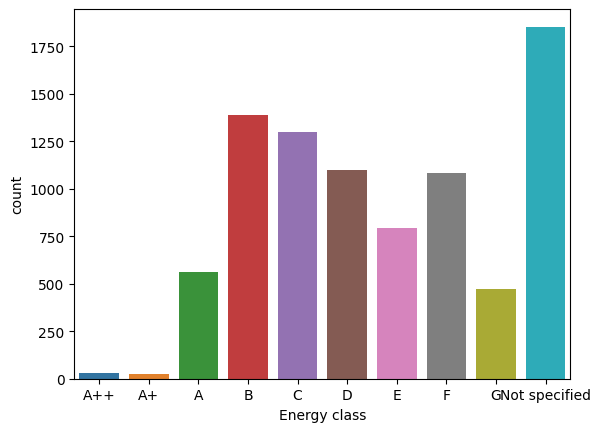

In [38]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

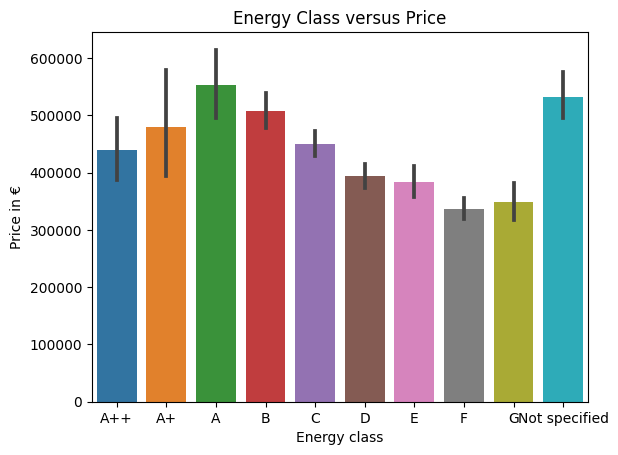

In [39]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

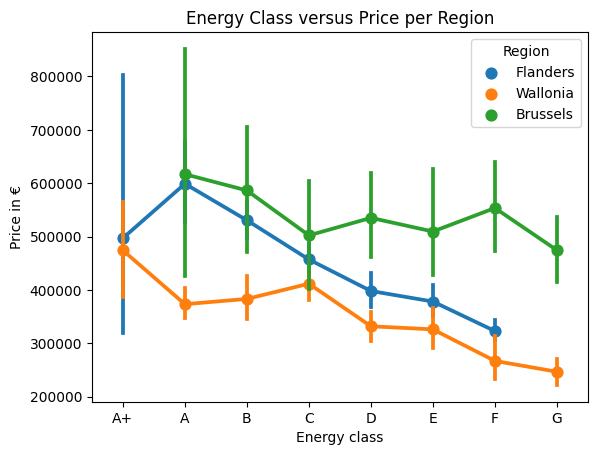

In [40]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

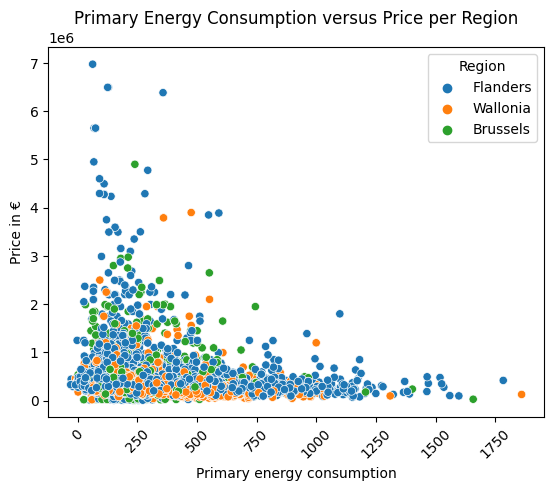

In [41]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=properties_raw).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

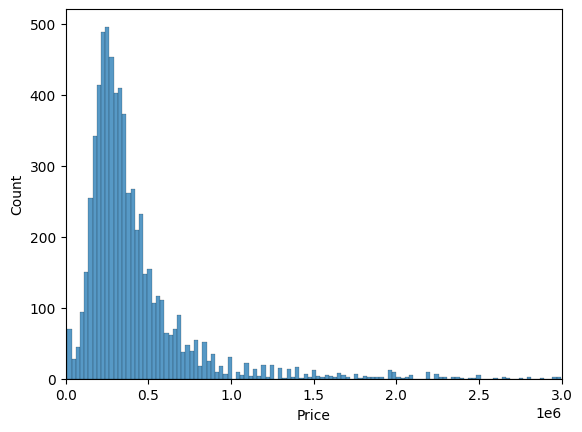

In [42]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()

### Energy Classes

,Energy_label,Flanders,Wallonia,Brussels
0,OMG,700.0,700,700.0
1,G,NaN,510,345.0
2,F,500.0,425,276.0
3,E,400.0,340,211.0
4,D,300.0,255,151.0
5,C,200.0,170,96.0
6,B,100.0,85,46.0
7,A,0.0,45,0.0
8,A+,-100.0,0,NaN


<Axes: xlabel='Energy_label', ylabel='Count'>

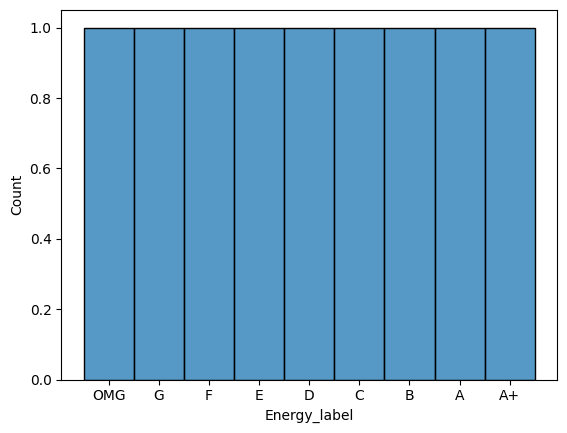

In [43]:
epc_be = pd.read_csv("../data/epc_be.csv")
display(epc_be)
sns.histplot(x="Energy_label", data=epc_be)